<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/04_06_%E3%82%A8%E3%83%B3%E3%82%B3%E3%83%BC%E3%83%89%E3%81%A8%E6%AD%A3%E8%A6%8F%E5%8C%96%E3%81%AE%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ダミーデータを使っての前処理デモ** 

必要な基本モジュールと設定の読み込み

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

[ UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)から[Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile)を取得する。このデータにはカラム名がついていないため，自分でカラム名を設定。ためしに最初の10レコードだけ出力させる

In [ ]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None, names=headers, na_values="?" )
df.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [ ]:
df.dtypes #各カラムのデータの型を確認 

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [ ]:
df.isnull().any() #各カラムに NaN が存在しているかどうかを確認。NaNが入っているデータならTrueとなる

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_doors             True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_cylinders        False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0] #NaNが入っているカラムごとにNaNの個数を確認

normalized_losses    41
num_doors             2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)].head() #NaNがでてくる行だけセレクトして最初の方だけ出力

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


# データの統計的性質を把握する

In [ ]:
df.describe() #それぞれのカラムに対する統計量を確認 型が数値の場合のみでNaNは除外された統計量となる

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


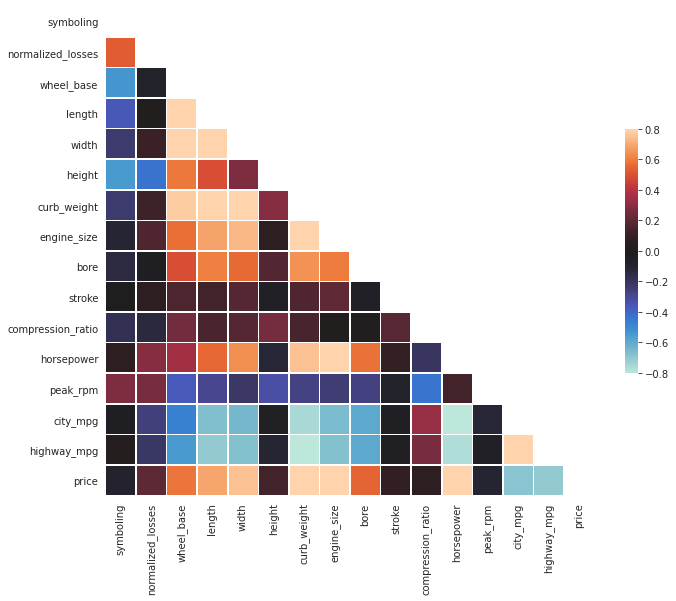

In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## ラベルエンコーダ

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df["make"].unique() #カラム "make"のユニークな要素を確認

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
le = LabelEncoder()
df["make_encode"] = le.fit_transform(df["make"]) #新たに make_encode というカラムをつくり，そこに makeの要素をエンコードした結果をいれる
df[["make", "make_encode"]].head(11) # make と make_encodeのペアを表示　メーカー（ラベル）ごとに異なる整数値（コード）が割り当てられる

,make,make_encode
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


## ラベルバイナライザ

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
df["body_style"].unique() #車のスタイルに関するユニークな要素を抽出

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [ ]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(df["body_style"]) #各要素をカラムとするマトリスクをつくる
pd.DataFrame(lb_results, columns=lb.classes_).head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


## ワンホットエンコーダー

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df[["make", "make_encode"]].head(11) #ラベルエンコーダの結果を再掲

,make,make_encode
0,alfa-romero,0
1,alfa-romero,0
2,alfa-romero,0
3,audi,1
4,audi,1
5,audi,1
6,audi,1
7,audi,1
8,audi,1
9,audi,1


In [ ]:
oh = OneHotEncoder()
oh.fit_transform(df["make_encode"].head(11).values.reshape(-1,1)).A #エンコード（整数）を各ビットで表現する　最初の11レコードに含まれるメーカーは3つなので3ビットにエンコードされる

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## MinMax正規化の例

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

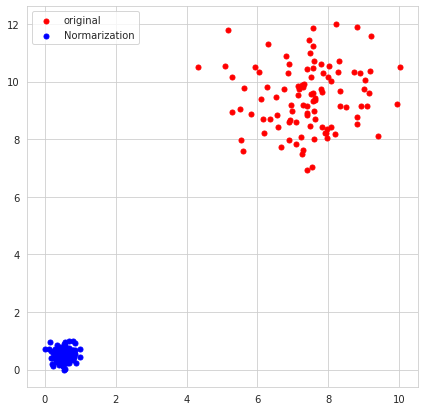

In [ ]:
# ダミーデータをつくる
from sklearn.datasets import make_blobs
# 2次元，分散１のクラスタ１つ　100個の点をつくる
X, Y = make_blobs(random_state=8,
                  n_samples=100, 
                  n_features=2, 
                  cluster_std=1.,
                  centers=1)
# 描画
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], marker='o', c="r", s=25,label="original")
# それぞれの軸で　最大１　最小０にスケーリング
XX = mms.fit_transform(X)
plt.scatter(XX[:, 0], XX[:, 1], marker='o', c="b", s=25, label="Normarization")

plt.legend()

## 標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

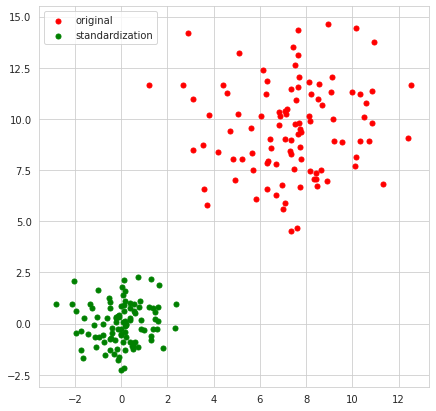

In [ ]:
#　ダミーデータをつくる
from sklearn.datasets import make_blobs
# 2次元，分散2のクラスタ１つ　100個の点をつくる
X, Y = make_blobs(random_state=8,
                  n_samples=100, 
                  n_features=2, 
                  cluster_std=2.,
                  centers=1)

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], marker='o', c="r", s=25,label="original")
# 標準化（それぞれの軸に対して，平均０，分散１）
XX = ss.fit_transform(X)
plt.scatter(XX[:, 0], XX[:, 1], marker='o', c="g", s=25, label="standardization")

plt.legend()